# WEEK 3
### CONVOLUTIONAL NUERAL NETWORKS
## VS 
### FULLY CONNECTED NEURAL NETWORKS

# ---------------------------------------------------------------------------------------------------------

# Name : Kartabya Krishna
# Date : 20230817
# Batch : B2

# ---------------------------------------------------------------------------------------------------------

#### Importing required libraries 

In [150]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.activations import relu , softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import cv2 as cv

from sklearn.preprocessing import OneHotEncoder

#### Importing the data

In [126]:
df=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=df.load_data()

#### Metadata of MNIST Dataset

## Q1) Understanding the Dataset and Pre-processing:

In [127]:
print("Fashion MNIST Dataset:")
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])
print("Image shape:", x_train[0].shape)
print("Number of classes:", len(set(y_train)))

Fashion MNIST Dataset:
Number of training samples: 60000
Number of test samples: 10000
Image shape: (28, 28)
Number of classes: 10


#### Exploratory Analysis

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Display one sample image from each class
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))

for class_index in range(len(classes)):
    class_samples = np.where(y_train == class_index)[0]
    sample_index = class_samples[0]  # Get the first sample of the current class
    plt.subplot(5, 5, class_index + 1)
    plt.imshow(x_train[sample_index], cmap='gray')
    plt.title(classes[class_index])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Display the distribution of classes
class_counts = np.bincount(y_train)
plt.bar(classes, class_counts)
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in Fashion MNIST')
plt.tight_layout()
plt.show()

# Display a random image from the dataset
random_index = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_index], cmap='gray')
plt.title(f"Random Image: {classes[y_train[random_index]]}")
plt.axis('off')
plt.show()

In [129]:
# Display the dimensions of each image
for i in range(len(x_train)):
    print(f"Image {i + 1} dimensions: {x_train[i].shape}")

Image 1 dimensions: (28, 28)
Image 2 dimensions: (28, 28)
Image 3 dimensions: (28, 28)
Image 4 dimensions: (28, 28)
Image 5 dimensions: (28, 28)
Image 6 dimensions: (28, 28)
Image 7 dimensions: (28, 28)
Image 8 dimensions: (28, 28)
Image 9 dimensions: (28, 28)
Image 10 dimensions: (28, 28)
Image 11 dimensions: (28, 28)
Image 12 dimensions: (28, 28)
Image 13 dimensions: (28, 28)
Image 14 dimensions: (28, 28)
Image 15 dimensions: (28, 28)
Image 16 dimensions: (28, 28)
Image 17 dimensions: (28, 28)
Image 18 dimensions: (28, 28)
Image 19 dimensions: (28, 28)
Image 20 dimensions: (28, 28)
Image 21 dimensions: (28, 28)
Image 22 dimensions: (28, 28)
Image 23 dimensions: (28, 28)
Image 24 dimensions: (28, 28)
Image 25 dimensions: (28, 28)
Image 26 dimensions: (28, 28)
Image 27 dimensions: (28, 28)
Image 28 dimensions: (28, 28)
Image 29 dimensions: (28, 28)
Image 30 dimensions: (28, 28)
Image 31 dimensions: (28, 28)
Image 32 dimensions: (28, 28)
Image 33 dimensions: (28, 28)
Image 34 dimensions

#### Preprocessing 

In [145]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Preprocess the data

# Normalize pixel values to a range between 0 and 1
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

# Convert labels to one-hot encoded vectors
y_train =to_categorical(y_train)
# y_test = to_categorical(y_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Print the shapes of the preprocessed data
print("Preprocessed Data Shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Preprocessed Data Shapes:
x_train shape: (60000, 28, 28)
y_train shape: (60000, 10, 2)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


## Q2) Performing experiments on Fully Connected Neural Networks (FCNN):

#### Step 1: Designing the FCNN Architecture

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Create a Sequential model
FCNN = Sequential()

# Flatten the input images
FCNN.add(Flatten(input_shape=(28, 28)))

# Add fully connected layers
FCNN.add(Dense(1000, activation='relu'))
FCNN.add(Dense(100, activation='relu'))
FCNN.add(Dense(10, activation='softmax'))

# Compile the model
FCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
FCNN.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 1000)              785000    
                                                                 
 dense_33 (Dense)            (None, 100)               100100    
                                                                 
 dense_34 (Dense)            (None, 10)                1010      
                                                                 
Total params: 886,110
Trainable params: 886,110
Non-trainable params: 0
_________________________________________________________________


#### Step 2: Training and Testing the Network

In [132]:
# Train the model
epochs = 10  # Experimenting with different random values

history1 = FCNN.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1)
FCNN.save('FCNN.h5')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4692 - accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3195 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.8972
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9009
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2503 - accuracy: 0.9060
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2406 - accuracy: 0.9090
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2315 - accuracy: 0.9120
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.219

#### Step 3: Plotting Performance Curves

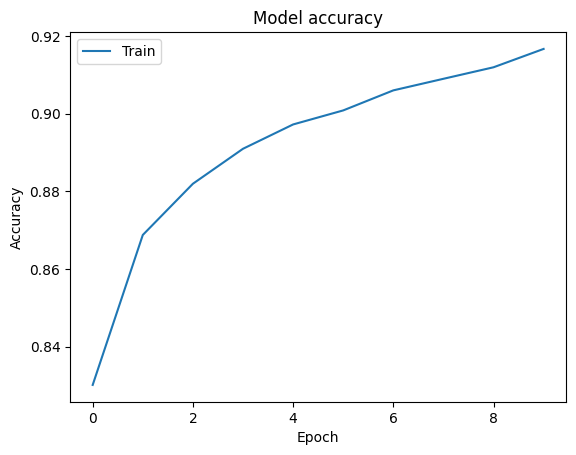

In [133]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')
plt.show()

## Q3) Performing experiments on a Convolutional Neural Networks (CNNs):

### a. Design CNN-1 which contains:
### • One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.
### • One Pooling layer which uses MAXPOOLING with stride =2.
### • One hidden layer having number of neurons = 100

In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Create CNN-1 architecture
CNN1 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
CNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
CNN1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 4608)              0         
                                                                 
 dense_35 (Dense)            (None, 100)               460900    
                                                                 
 dense_36 (Dense)            (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_______________________________________________

In [135]:
history2 = CNN1.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.25,
                    verbose=1)
CNN1.save('CNN1.h5')

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4433 - accuracy: 0.8446 - val_loss: 0.3332 - val_accuracy: 0.8803
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3030 - accuracy: 0.8914 - val_loss: 0.2995 - val_accuracy: 0.8955
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9063 - val_loss: 0.3065 - val_accuracy: 0.8862
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2231 - accuracy: 0.9188 - val_loss: 0.2642 - val_accuracy: 0.9067
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1927 - accuracy: 0.9284 - val_loss: 0.2558 - val_accuracy: 0.9109
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1708 - accuracy: 0.9356 - val_loss: 0.2817 - val_accuracy: 0.9021
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1494 - accuracy: 0.9434 - val_loss: 0.2881 - val_accuracy:

### b. Design CNN-2 which contains:
### • Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1, and padding =0.
### • One Pooling layer which uses MAXPOOLING with stride =2.
### • One hidden layer having number of neurons = 100


In [136]:
# Create the Sequential model
CNN2 = Sequential()

# Convolutional Layer 1
CNN2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Convolutional Layer 2
CNN2.add(Conv2D(32, (3, 3), activation='relu'))
# MaxPooling Layer
CNN2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# Flatten Layer
CNN2.add(Flatten())
# Hidden Layer
CNN2.add(Dense(100, activation='relu'))
# Output Layer (modify units and activation based on your task)
CNN2.add(Dense(num_classes, activation='softmax'))

# Compile the model
CNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
CNN2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 4608)              0         
                                                                 
 dense_37 (Dense)            (None, 100)               460900    
                                                                 
 dense_38 (Dense)            (None, 10)                1010      
                                                     

In [137]:
history3 = CNN2.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.25,
                    verbose=1)
CNN2.save('CNN2.h5')

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4167 - accuracy: 0.8527 - val_loss: 0.3105 - val_accuracy: 0.8855
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2624 - accuracy: 0.9040 - val_loss: 0.2526 - val_accuracy: 0.9073
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2121 - accuracy: 0.9214 - val_loss: 0.2395 - val_accuracy: 0.9137
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1695 - accuracy: 0.9383 - val_loss: 0.2391 - val_accuracy: 0.9143
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1337 - accuracy: 0.9503 - val_loss: 0.2472 - val_accuracy: 0.9193
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1039 - accuracy: 0.9623 - val_loss: 0.2613 - val_accuracy: 0.9157
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0831 - accuracy: 0.9689 - val_loss: 0.2846 - val_accuracy:

In [138]:
import tensorflow as tf

# Load saved models
cnn_model1 = tf.keras.models.load_model('CNN1.h5') 
cnn_model2 = tf.keras.models.load_model('CNN2.h5')
fcnn_model = tf.keras.models.load_model('FCNN.h5')

# Print model summaries to compare the number of parameters
print("CNN-1 Model Summary:")
cnn_model1.summary()

print("\nCNN-2 Model Summary:")
cnn_model2.summary()

print("\nFCNN Model Summary:")
fcnn_model.summary()

CNN-1 Model Summary:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 4608)              0         
                                                                 
 dense_35 (Dense)            (None, 100)               460900    
                                                                 
 dense_36 (Dense)            (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________

In [139]:
def loss_plot(df):
    plt.plot(df.index,df['loss'],color = 'r',label = 'Loss')
    plt.plot(df.index,df['val_loss'],color = 'b',label = 'Validation Loss')
    plt.legend()
    plt.xlabel("EPochs")
    plt.ylabel("Loss")
    plt.show()

In [152]:
hist2 = pd.DataFrame(history2.history)
hist3 = pd.DataFrame(history3.history)
hist2

loss  accuracy  val_loss  val_accuracy
0  0.443325  0.844600  0.333159      0.880267
1  0.302959  0.891378  0.299529      0.895467
2  0.256653  0.906333  0.306451      0.886200
3  0.223058  0.918822  0.264164      0.906667
4  0.192733  0.928356  0.255822      0.910933
5  0.170841  0.935578  0.281730      0.902133
6  0.149354  0.943400  0.288136      0.903867
7  0.131403  0.952267  0.269862      0.911467
8  0.115698  0.956978  0.276934      0.911000
9  0.101111  0.962356  0.303148      0.908733

In [153]:
hist3

loss  accuracy  val_loss  val_accuracy
0  0.416698  0.852733  0.310459      0.885533
1  0.262411  0.904044  0.252638      0.907267
2  0.212138  0.921400  0.239476      0.913733
3  0.169522  0.938289  0.239147      0.914333
4  0.133682  0.950311  0.247206      0.919267
5  0.103877  0.962311  0.261306      0.915667
6  0.083094  0.968911  0.284631      0.916667
7  0.062920  0.976467  0.318147      0.916267
8  0.049237  0.981156  0.328816      0.919067
9  0.039579  0.985644  0.379248      0.919200

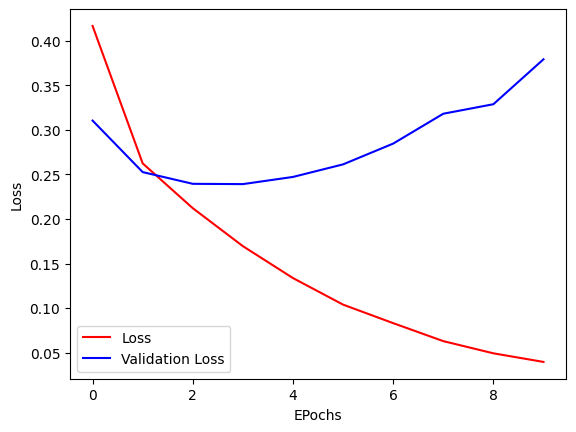

In [141]:
loss_plot(hist2)
loss_plot(hist3)

#### The two preceding graphs depict the loss trends over various epochs for two convolutional neural networks (convnet 1 and convnet 2). In the case of the second model, the validation loss starts to rise after a certain point, which suggests that the model is beginning to overfit the training data. Conversely, the second model, represented in the first graph, demonstrates consistent behavior as its validation loss remains relatively stable throughout, indicating a lack of overfitting to the training data.